In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import math
import copy
import pandas as pd
#%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

In [2]:
def data_from_json(name):
    data = []
    #Each line in the json is an evolutionary run
    with open(name, 'r') as fp:

        for levels_json in fp:
            if levels_json != "\n":
                di = json.loads(levels_json)
                data.append(di)
    return data

def plot_mat_3d(mats, title, sup_title, save_fig = False):
    fig = plt.figure()
    fig.suptitle(sup_title, fontsize=16)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)
    for mat in mats:
        xs = mat[:, 0]

        ys = mat[:, 1]

        zs = mat[:, 2]

        ax.scatter(xs,ys,zs)
    if save_fig:
        plt.savefig(f"{title}-{sup_title}.png")
    plt.show()
    
def plot_mat_2d_lines(mats, title, sup_title):
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    fig.suptitle(sup_title, fontsize=16)
    ax = fig.add_subplot(111)
    ax.set_title(title)
    for j in range(len(mats[1])):
        x = [0, 2*mats[1][j, 0]]
        y = [0, 2*mats[1][j, 1]]
        #ax.scatter(x,y,z)
        ax.plot(x, y, color='red')

    for mat in mats:


        xs = mat[:, 0]

        ys = mat[:, 1]


        ax.scatter(xs,ys, s=10)
    plt.show()
    
def plot_mat_2d(mats, title, sup_title, labels = [], save_fig = False):
    # plt.rcParams["figure.figsize"] = [7.50, 3.50]
    # plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    fig.suptitle(sup_title, fontsize=16)
    ax = fig.add_subplot(111)
    ax.set_title(title)

    for i, mat in enumerate(mats):
        if len(labels) != 0 and mat.shape[0] == 1:
            ax.scatter(mat[:,0], mat[:,1])
            ax.annotate(labels[i], (mat[:,0], mat[:,1]))
        elif len(labels) != 0:
            xs = mat[:, 0]
            ys = mat[:, 1]
            ax.scatter(xs, ys, label = labels[i] )

        else:
            xs = mat[:, 0]
            ys = mat[:, 1]
            ax.scatter(xs, ys)

    ax.legend()
    if save_fig:
        plt.savefig(f"{title}-{sup_title}.png")
    plt.show()
    
def multiplot_2d(mats, title, sup_title, x_axis_label, y_axis_label, labels = [], save_fig = False):
    # plt.rcParams["figure.figsize"] = [7.50, 3.50]
    # plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    fig.suptitle(sup_title, fontsize=16)
    ax = fig.add_subplot(111)
    ax.set_title(title)

    for i, mat in enumerate(mats):
        if len(labels) != 0:
            xs = mat[:, 0]
            ys = mat[:, 1]
            ax.plot(xs, ys, label = labels[i] )

        else:
            xs = mat[:, 0]
            ys = mat[:, 1]
            ax.plot(xs, ys)

    ax.legend()
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    if save_fig:
        plt.savefig(f"{title}-{sup_title}.png")
    plt.show()

In [27]:
data_so = data_from_json('body_brain_data2_analytics.json')
data_qn = data_from_json('body_brain_qn_data_analytics.json')
data_nslc = data_from_json('body_brain_nslc_data_analytics.json')

In [49]:
##Coverage plots
so_coverage_mat = np.array([data_so[i]["coverage"] for i in range(1, len(data_so))])
so_coverage_min = np.vstack((np.arange(1, so_coverage_mat.shape[1] + 1), np.min(so_coverage_mat, axis = 0)))
so_coverage_max = np.vstack((np.arange(1, so_coverage_mat.shape[1] + 1), np.max(so_coverage_mat, axis = 0)))
so_coverage_median = np.vstack((np.arange(1, so_coverage_mat.shape[1] + 1), np.mean(so_coverage_mat, axis = 0)))
##Fitness plots
so_fitness_mat = []
for i in range(1, len(data_so)):
    so_fitness_mat += [np.max(data_so[i]["fitness"], axis = 1)]
so_fitness_min = np.vstack((np.arange(1, so_coverage_mat.shape[1] + 1), np.min(so_fitness_mat, axis = 0)))
so_fitness_max = np.vstack((np.arange(1, so_coverage_mat.shape[1] + 1), np.max(so_fitness_mat, axis = 0)))
so_fitness_median = np.vstack((np.arange(1, so_coverage_mat.shape[1] + 1), np.mean(so_fitness_mat, axis = 0)))
##QD-score plots
so_qd_score_mat = np.array([data_so[i]["qd-score"] for i in range(1, len(data_so))])
so_qd_score_min = np.vstack((np.arange(1, so_coverage_mat.shape[1] + 1), np.min(so_qd_score_mat, axis = 0)))
so_qd_score_max = np.vstack((np.arange(1, so_coverage_mat.shape[1] + 1), np.max(so_qd_score_mat, axis = 0)))
so_qd_score_median = np.vstack((np.arange(1, so_coverage_mat.shape[1] + 1), np.mean(so_qd_score_mat, axis = 0)))


##Coverage plots
qn_coverage_mat = np.array([data_qn[i]["coverage"] for i in range(len(data_qn))])
qn_coverage_min = np.vstack((np.arange(1, qn_coverage_mat.shape[1] + 1), np.min(qn_coverage_mat, axis = 0)))
qn_coverage_max = np.vstack((np.arange(1, qn_coverage_mat.shape[1] + 1), np.max(qn_coverage_mat, axis = 0)))
qn_coverage_median = np.vstack((np.arange(1, qn_coverage_mat.shape[1] + 1), np.mean(qn_coverage_mat, axis = 0)))
##Fitness plots
qn_fitness_mat = []
for i in range(len(data_qn)):
    qn_fitness_mat += [np.max(data_qn[i]["fitness"], axis = 1)]
qn_fitness_min = np.vstack((np.arange(1, qn_coverage_mat.shape[1] + 1), np.min(qn_fitness_mat, axis = 0)))
qn_fitness_max = np.vstack((np.arange(1, qn_coverage_mat.shape[1] + 1), np.max(qn_fitness_mat, axis = 0)))
qn_fitness_median = np.vstack((np.arange(1, qn_coverage_mat.shape[1] + 1), np.mean(qn_fitness_mat, axis = 0)))
##QD-score plots
qn_qd_score_mat = np.array([data_qn[i]["qd-score"] for i in range(1, len(data_qn))])
qn_qd_score_min = np.vstack((np.arange(1, qn_coverage_mat.shape[1] + 1), np.min(qn_qd_score_mat, axis = 0)))
qn_qd_score_max = np.vstack((np.arange(1, qn_coverage_mat.shape[1] + 1), np.max(qn_qd_score_mat, axis = 0)))
qn_qd_score_median = np.vstack((np.arange(1, qn_coverage_mat.shape[1] + 1), np.mean(qn_qd_score_mat, axis = 0)))


##Coverage plots
nslc_coverage_mat = np.array([data_nslc[i]["coverage"] for i in range(len(data_nslc))])
#nslc_coverage_min = np.vstack((np.arange(1, nslc_coverage_mat.shape[0] + 1), np.min(nslc_coverage_mat, axis = 0)))
#nslc_coverage_max = np.vstack((np.arange(1, nslc_coverage_mat.shape[0] + 1), np.max(nslc_coverage_mat, axis = 0)))
nslc_coverage_median = np.vstack((np.arange(1, nslc_coverage_mat.shape[1] + 1), nslc_coverage_mat))
##Fitness plots
nslc_fitness_mat = []
#for i in range(1, len(data_nslc)):
nslc_fitness_mat = np.max(data_nslc[0]["fitness"], axis = 1)
#nslc_fitness_min = np.vstack((np.arange(1, nslc_coverage_mat.shape[0] + 1), np.min(nslc_fitness_mat, axis = 0)))
#nslc_fitness_max = np.vstack((np.arange(1, nslc_coverage_mat.shape[0] + 1), np.max(nslc_fitness_mat, axis = 0)))
nslc_fitness_median = np.vstack((np.arange(1, nslc_fitness_mat.shape[0] + 1), nslc_fitness_mat))
##QD-score plots
nslc_qd_score_mat = np.array([data_nslc[i]["qd-score"] for i in range(len(data_nslc))])
#nslc_qd_score_min = np.vstack((np.arange(1, nslc_coverage_mat.shape[0] + 1), np.min(nslc_qd_score_mat, axis = 0)))
#nslc_qd_score_max = np.vstack((np.arange(1, nslc_coverage_mat.shape[0] + 1), np.max(nslc_qd_score_mat, axis = 0)))
nslc_qd_score_median = np.vstack((np.arange(1, nslc_qd_score_mat.shape[1] + 1), nslc_qd_score_mat))

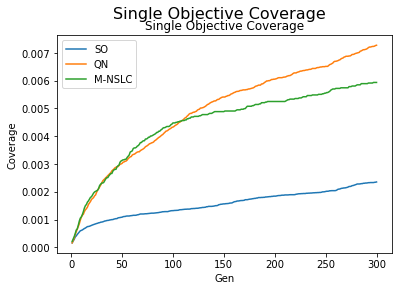

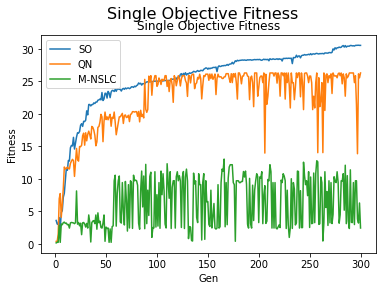

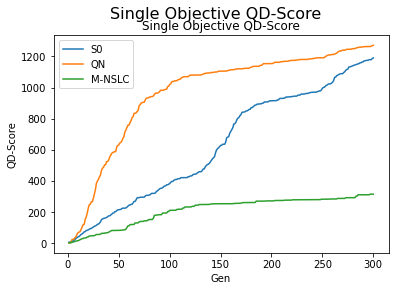

In [50]:
multiplot_2d(np.array([so_coverage_median.T, qn_coverage_median.T, nslc_coverage_median.T]), "Single Objective Coverage", "Single Objective Coverage",  "Gen", "Coverage", labels = ["SO", "QN", "M-NSLC"], save_fig = True)
multiplot_2d(np.array([so_fitness_median.T, qn_fitness_median.T, nslc_fitness_median.T]), "Single Objective Fitness", "Single Objective Fitness",  "Gen", "Fitness", labels = ["SO", "QN", "M-NSLC"], save_fig = True)
multiplot_2d(np.array([so_qd_score_median.T, qn_qd_score_median.T, nslc_qd_score_median.T]), "Single Objective QD-Score", "Single Objective QD-Score",  "Gen", "QD-Score", labels = ["S0", "QN", "M-NSLC"], save_fig = True)

In [51]:
## Morpho maps
so_archive_progression = np.array([data_so[i]["archive_progression"] for i in range(1, len(data_so))])
qn_archive_progression = np.array([data_qn[i]["archive_progression"] for i in range(len(data_qn))])
nslc_archive_progression = np.array([data_nslc[i]["archive_progression"] for i in range(len(data_nslc))])

In [53]:
print(so_archive_progression.shape)
print(qn_archive_progression.shape)
print(nslc_archive_progression.shape)

(5, 300, 46656)
(2, 300, 46656)
(1, 300, 46656)


In [66]:
flattened_feat_map_so_mean = np.mean(np.max(so_archive_progression, axis = 0),axis = 0)
flattened_feat_map_qn_mean = np.mean(np.max(qn_archive_progression, axis = 0),axis = 0)
flattened_feat_map_nslc_mean = np.mean(np.max(nslc_archive_progression, axis = 0),axis = 0)
flattened_feat_map_so_max = np.max(np.max(so_archive_progression, axis = 0),axis = 0)
flattened_feat_map_qn_max = np.max(np.max(qn_archive_progression, axis = 0),axis = 0)
flattened_feat_map_nslc_max = np.max(np.max(nslc_archive_progression, axis = 0),axis = 0)
mean_feat_maps = [flattened_feat_map_so_mean, flattened_feat_map_qn_mean, flattened_feat_map_nslc_mean]
max_feat_maps = [flattened_feat_map_so_max, flattened_feat_map_qn_max, flattened_feat_map_nslc_max]

In [67]:
import itertools
feats = [list(np.linspace(0, 216, 216)), list(np.linspace(0, 216, 216))]
bc_space = []
for element in itertools.product(*feats):
    bc_space += [list(element)]

In [68]:
bc_space = np.array(bc_space)
bc_space.shape

(46656, 2)

/tmp/ipykernel_17082/1161407461.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  col = ax.pcolormesh(X,Y,Z.T)


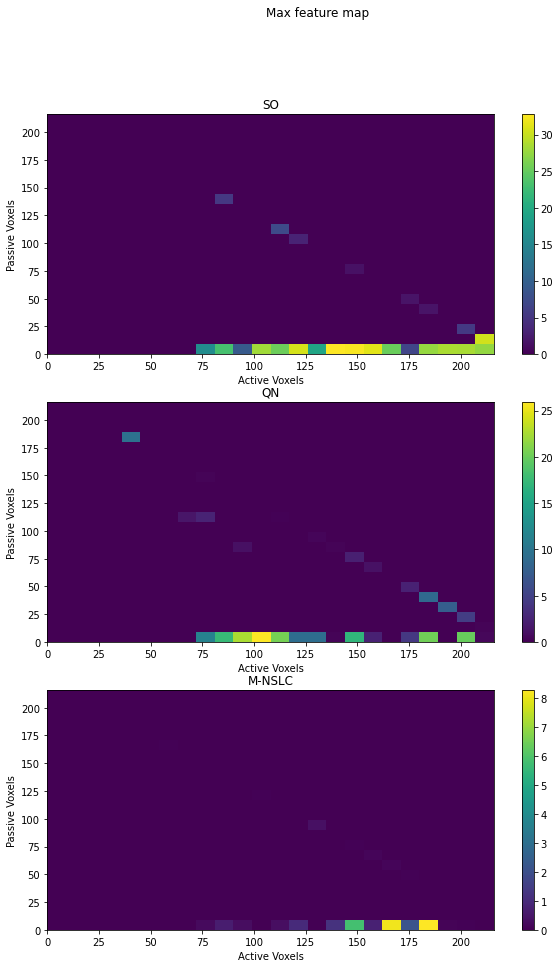

/tmp/ipykernel_17082/1161407461.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  col = ax.pcolormesh(X,Y,Z.T)


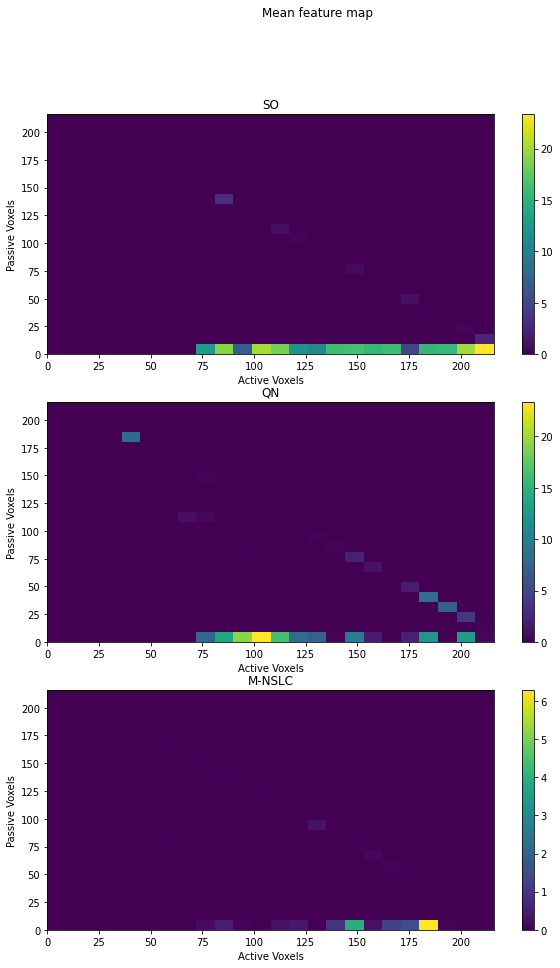

In [76]:
x, y, z = bc_space[:,0], bc_space[:,1], flattened_feat_map_so_max
subplot_titles = ["SO", "QN", "M-NSLC"]
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as spinterp

## define data
npoints = 25
xreg = np.linspace(x.min(),x.max(),npoints)
yreg = np.linspace(y.min(),y.max(),npoints)
X,Y = np.meshgrid(xreg,yreg)


## plot
plt.close()
fig, axs = plt.subplots(3, 1)
fig.suptitle('Max feature map')
fig.set_size_inches(10, 15)
for i, ax in enumerate(axs):
    ax.set_xlabel('Active Voxels')
    ax.set_ylabel('Passive Voxels')
    ax.set_title(subplot_titles[i])
    z = max_feat_maps[i]
    Z = spinterp.griddata(np.vstack((x,y)).T,z,(X,Y),
                      method='linear').reshape(X.shape)
    col = ax.pcolormesh(X,Y,Z.T)
    fig.colorbar(col, ax=ax, location='right')
plt.show()


## plot
plt.close()
fig, axs = plt.subplots(3, 1)
fig.suptitle('Mean feature map')
fig.set_size_inches(10, 15)
for i, ax in enumerate(axs):
    ax.set_xlabel('Active Voxels')
    ax.set_ylabel('Passive Voxels')
    ax.set_title(subplot_titles[i])
    z = mean_feat_maps[i]
    Z = spinterp.griddata(np.vstack((x,y)).T,z,(X,Y),
                      method='linear').reshape(X.shape)
    col = ax.pcolormesh(X,Y,Z.T)
    fig.colorbar(col, ax=ax, location='right')
plt.show()